# Google Play Store EDA
---
# Dataset Information
- Data : Google Play Store Apps Dataset
- link: https://www.kaggle.com/lava18/google-play-store-apps

__Content__

This dataset contains information about various apps available on the Google Play Store, including their categories, ratings, reviews, size, installs, type, price, content rating, genres, last updated date, current version, and Android version requirements.

__Acknowledgements__

This information is scraped from the Google Play Store. This app information would not be available without it.


# Objective
- Perform Exploratory Data Analysis (EDA) on the Google Play Store Apps dataset to uncover insights about app categories, ratings, reviews, and other relevant features.



# 1. Importing Libraries

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Data loading, exploration and cleaning

In [4]:
df = pd.read_csv('./data/googleplaystore.csv')

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# view the shape of the data
df.shape

(10841, 13)

- No. of rows= 10841, No. of columns= 13

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


we can see that dataset has 5 numeric columns but it only shows 2 numeric columns because other numeric columns have some non-numeric values which are preventing pandas from recognizing them as numeric columns.

In [8]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

---
## obervations
- M
- k
- Varies with device
---

In [9]:
# Find the values having M in Size column
df[df['Size'].str.contains('M')]['Size'].value_counts().sum()

np.int64(8830)

In [10]:
# Find the values having k in Size column
df[df['Size'].str.contains('k')]['Size'].value_counts().sum()

np.int64(316)

In [11]:
# Find the values having "Varies with device" in Size column
df[df['Size'].str.contains('Varies with device')]['Size'].value_counts().sum()

np.int64(1695)

In [12]:
# convert Size column to numeric
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    elif 'Varies with device' in size:
        return np.nan
    else:
        return float(size.replace('M', ''))
df['Size'] = df['Size'].apply(convert_size)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
# Rename size column to Size (in MB)
df.rename(columns={'Size': 'Size_in_MB'}, inplace=True)

In [14]:
df.head()

,App,Category,Rating,Reviews,Size_in_MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [15]:
df["Installs"].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

## Lets remove + sign and , sign from Installs column and convert it to numeric

In [16]:
# remove + and , from Installs column
df['Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
df['Installs'] = pd.to_numeric(df['Installs'])
df['Installs'].dtype

dtype('int64')

In [17]:
df.head()

,App,Category,Rating,Reviews,Size_in_MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
# Making new column called Installs_category based on no. of installs and binning them
bins = [0, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, 10000000000]
labels = ['0-1K', '1K-10K', '10K-100K', '100K-1M', '1M-10M', '10M-100M', '100M-1B', '1B-10B']
df['Installs_category'] = pd.cut(df['Installs'] , bins=bins, labels=labels)
df.head()

,App,Category,Rating,Reviews,Size_in_MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1K-10K
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,100K-1M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1M-10M
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,10M-100M
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,10K-100K


In [19]:
df["Installs_category"].value_counts()

Installs_category
0-1K        2697
100K-1M     2118
1M-10M      2004
10K-100K    1648
1K-10K      1531
10M-100M     698
100M-1B      130
1B-10B         0
Name: count, dtype: int64

In [20]:
df["Price"].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$3.61          1
$394.99        1
$1.26          1
$1.20          1
$1.04          1
Name: count, Length: 92, dtype: int64

In [21]:
# Now we convert Price column to numeric by removing '$' sign
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)


In [22]:
df.describe()

,Rating,Reviews,Size_in_MB,Installs,Price
count,9367.000000,1.084100e+04,9146.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,21.514141,1.546291e+07,1.027273
std,0.515735,2.927629e+06,22.588679,8.502557e+07,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [23]:
#  using f string print the min, max and average price of the apps
min_price = df['Price'].min()
max_price = df['Price'].max()
avg_price = df['Price'].mean()
print(f"Minimum price: {min_price:.2f}")
print(f"Maximum price: {max_price:.2f}")
print(f"Average price: {avg_price:.2f}")

Minimum price: 0.00
Maximum price: 400.00
Average price: 1.03


In [24]:
# Find missing values in each column
df.isnull().sum().sort_values(ascending=False)

Size_in_MB           1695
Rating               1474
Installs_category      15
Current Ver             8
Android Ver             2
App                     1
Genres                  1
Type                    1
Category                0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Last Updated            0
dtype: int64

In [25]:
# missing values percentage
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage.sort_values(ascending=False)

Size_in_MB           15.635089
Rating               13.596532
Installs_category     0.138364
Current Ver           0.073794
Android Ver           0.018448
App                   0.009224
Genres                0.009224
Type                  0.009224
Category              0.000000
Reviews               0.000000
Installs              0.000000
Price                 0.000000
Content Rating        0.000000
Last Updated          0.000000
dtype: float64

### Descriptive Statistics

In [26]:
df.describe()

,Rating,Reviews,Size_in_MB,Installs,Price
count,9367.000000,1.084100e+04,9146.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,21.514141,1.546291e+07,1.027273
std,0.515735,2.927629e+06,22.588679,8.502557e+07,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


### Observations
- The average rating of apps is around 4.17, with a maximum rating of 5.0 and a minimum rating of 1.0.
- The average number of reviews per app is approximately 1,574, with a maximum of 781,583 reviews and a minimum of 0 reviews. 

## Now we have to deal with the missing values in the dataset
- We can see that there are missing values in Rating, Size, Type, Price, Content Rating, Current Ver and Android Ver columns.   

In [27]:
# Total number of missing values in the dataset
df.isnull().sum().sum()

np.int64(3197)

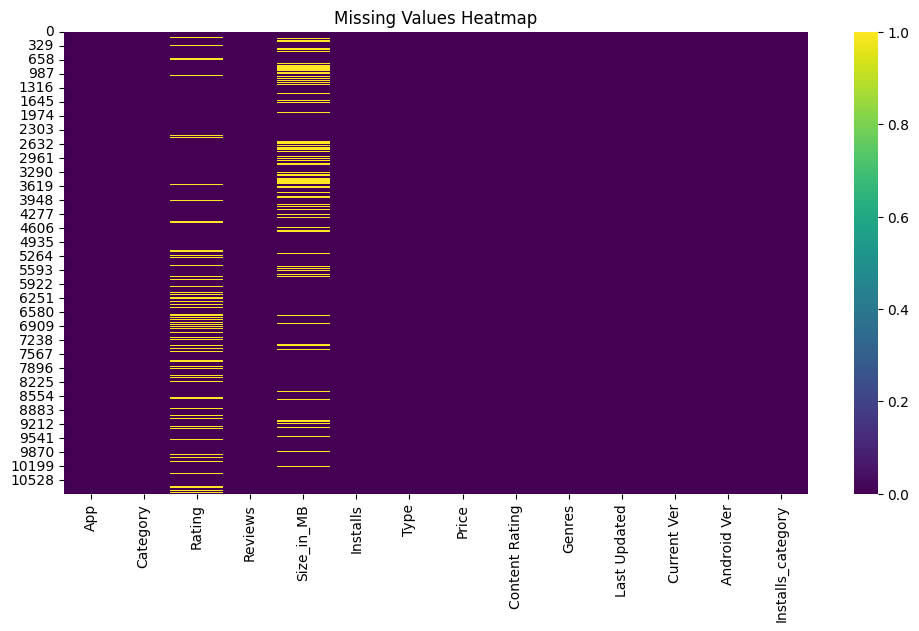

In [28]:
# Plot missing values heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()  

In [29]:
df.head()

,App,Category,Rating,Reviews,Size_in_MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1K-10K
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,100K-1M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1M-10M
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,10M-100M
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,10K-100K


In [30]:
df.isnull().sum().sort_values(ascending=False)

Size_in_MB           1695
Rating               1474
Installs_category      15
Current Ver             8
Android Ver             2
App                     1
Genres                  1
Type                    1
Category                0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Last Updated            0
dtype: int64

## Observations
---
- We have 1695 values missing in Rating column which is approximately 15.6% of total values in that column.
- We have 1474 values missing in Rating column which is approximately 13.6% of total values in that column.
- We have 8 values missing in Current Ver column which is approximately 0.07% of total values in that column.
- We have 2 values missing in Android Ver column which is approximately 0.02% of total values in that column.
- We have 1 value missing in App, Genres, Type columns which is approximately 0.009% of total values in that column.
---
### Handling Missing Values
- We cannot impute rating column as it directly linked with installs and reviews columns. To test this hypothesis we need to plot rating column with installs and size columns and statisticlly test it using pearson correlation test.


In [31]:
df.describe()     # these are numeric columns

,Rating,Reviews,Size_in_MB,Installs,Price
count,9367.000000,1.084100e+04,9146.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,21.514141,1.546291e+07,1.027273
std,0.515735,2.927629e+06,22.588679,8.502557e+07,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


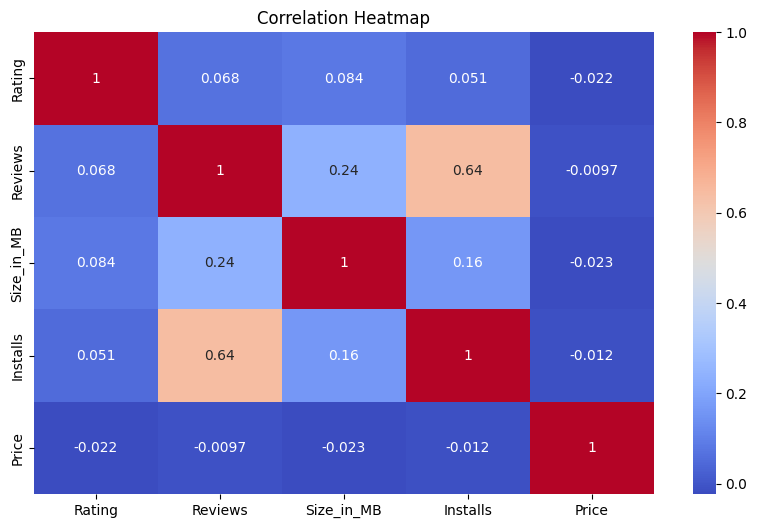

In [32]:
# make a correlation heatmap for numeric columns
plt.figure(figsize=(10, 6))
numeric_cols = ["Rating", "Reviews", "Size_in_MB", "Installs", "Price"]
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## we can calculate perason correlation coefficient and p-value using scipy library

In [33]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [34]:
from scipy.stats import pearsonr

# remove row with missing values
df_clean = df.dropna()

# calculate correlation between Reviews and Installs
corr, _ = pearsonr(df_clean["Reviews"], df_clean["Installs"])
print(f"Correlation between Reviews and Installs: {corr}")

Correlation between Reviews and Installs: 0.6261872485356998


## Observations
---
- The correlation coefficient between Reviews and Installs is approximately 0.62, indicating a moderate positive correlation. This suggests that as the number of reviews increases, the number of installs tends to increase as well.
- The correlation coefficient between reviews and size in mb is 0.24, indicating a weak positive correlation. This suggests that there is a slight tendency for larger apps to receive more reviews, but the relationship is not very strong.
---
Befor moving ahead lets remove rows with missing values in current ver, category, type, genere and android ver columns as they have very few missing values.

In [35]:
# Length before removing missing values
len_before = len(df)
print(f"Length of dataset before removing missing values: {len_before}")

Length of dataset before removing missing values: 10841


In [36]:
# remove rows with missing values in specific columns
df = df.dropna(subset=['Current Ver','Android Ver','Installs_category', 'Category', 'Type', 'Genres'])

In [37]:
# Length after removing missing values
len_after = len(df)
print(f"Length of dataset after removing missing values: {len_after}")

Length of dataset after removing missing values: 10815


In [38]:
# lets check missing values again
df.isnull().sum().sort_values(ascending=False)

Size_in_MB           1694
Rating               1455
Category                0
App                     0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

## Observations
---
- Now only Size_in_MB and Rating columns have missing values.

In [39]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_MB', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Installs_category'],
      dtype='object')

In [40]:
# Use group by function to find trend of rating in each installs category
df.groupby('Installs_category')['Rating'].describe()

C:\Users\aniruddh\AppData\Local\Temp\ipykernel_8732\1340149837.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Installs_category')['Rating'].describe()


,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
0-1K,1359.0,4.198749,0.833807,1.0,3.9,4.4,4.8,5.0
1K-10K,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
10K-100K,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
100K-1M,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
1M-10M,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
10M-100M,698.0,4.386533,0.192817,3.1,4.3,4.4,4.5,4.8
100M-1B,130.0,4.309231,0.186126,3.7,4.2,4.3,4.4,4.7
1B-10B,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Now we will fill missing values of rating with respective installs category mean

In [41]:
df["Rating"].fillna(df.groupby("Installs_category")["Rating"].transform("mean"), inplace=True)

C:\Users\aniruddh\AppData\Local\Temp\ipykernel_8732\407903929.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["Rating"].fillna(df.groupby("Installs_category")["Rating"].transform("mean"), inplace=True)


In [43]:
df["Rating" ].isnull().sum()

np.int64(0)

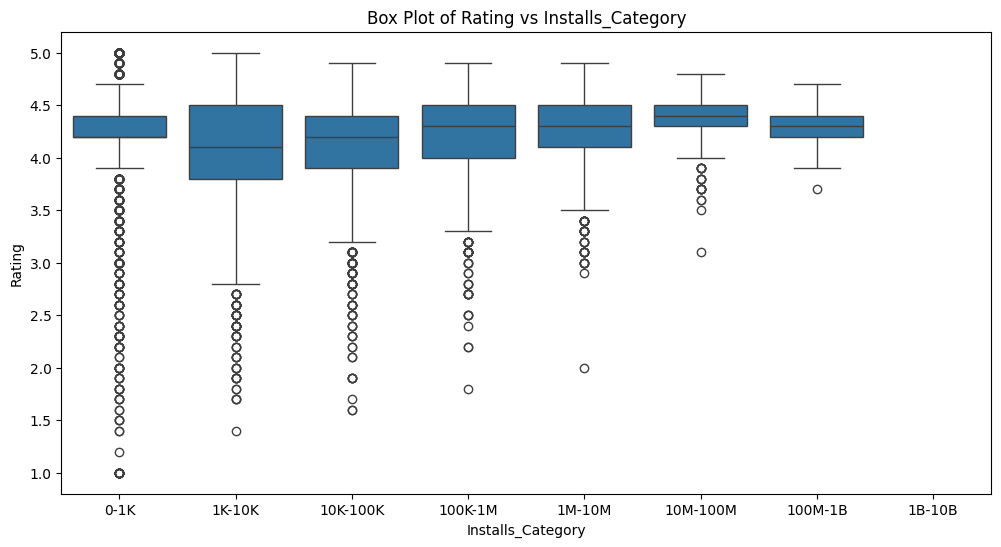

In [45]:
# Plot the box plot of rating vs Installs_category
plt.figure(figsize=(12, 6))
sns.boxplot(x="Installs_category", y="Rating", data=df)
plt.title("Box Plot of Rating vs Installs_Category")
plt.xlabel("Installs_Category")
plt.ylabel("Rating")
plt.show()

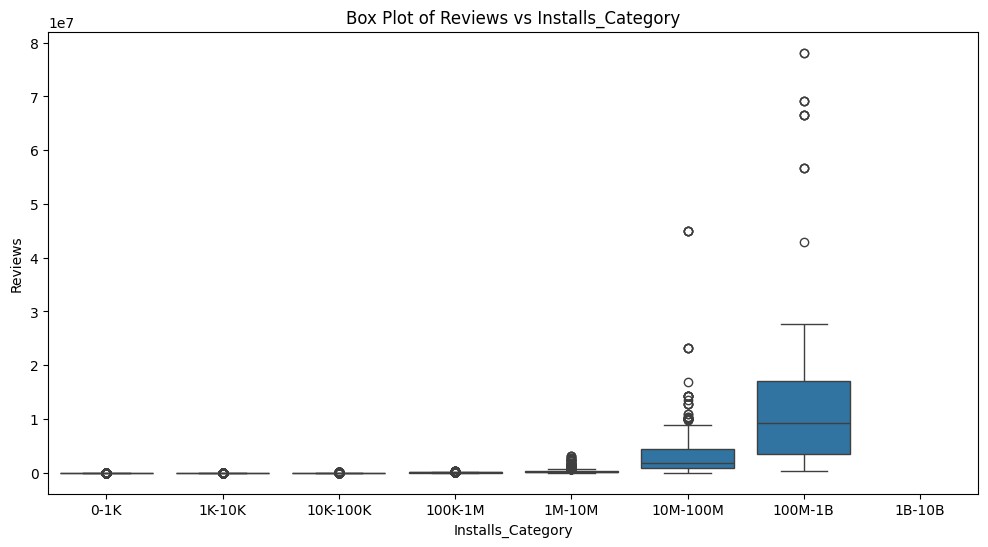

In [46]:
# Plot box plot for reviews vs Installs_category
plt.figure(figsize=(12, 6))
sns.boxplot(x="Installs_category", y="Reviews", data=df)
plt.title("Box Plot of Reviews vs Installs_Category")
plt.xlabel("Installs_Category")
plt.ylabel("Reviews")
plt.show()

- The data looks really imbalance, lets normalize the data using log transformation

c:\Users\aniruddh\miniconda3\envs\python_eda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


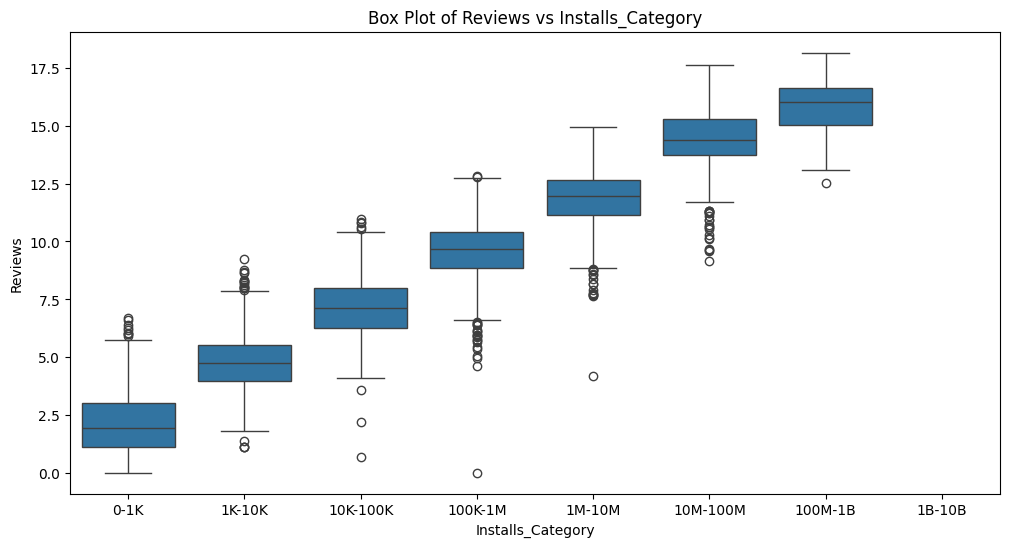

In [50]:
# Plot box plot for reviews vs Installs_category after log transformation
plt.figure(figsize=(12, 6))
sns.boxplot(x="Installs_category", y=np.log(df["Reviews"]), data=df)
plt.title("Box Plot of Reviews vs Installs_Category")
plt.xlabel("Installs_Category")
plt.ylabel("Reviews")
plt.show()


In [51]:
# Final info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10815 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   App                10815 non-null  object  
 1   Category           10815 non-null  object  
 2   Rating             10815 non-null  float64 
 3   Reviews            10815 non-null  int64   
 4   Size_in_MB         9121 non-null   float64 
 5   Installs           10815 non-null  int64   
 6   Type               10815 non-null  object  
 7   Price              10815 non-null  float64 
 8   Content Rating     10815 non-null  object  
 9   Genres             10815 non-null  object  
 10  Last Updated       10815 non-null  object  
 11  Current Ver        10815 non-null  object  
 12  Android Ver        10815 non-null  object  
 13  Installs_category  10815 non-null  category
dtypes: category(1), float64(3), int64(2), object(8)
memory usage: 1.2+ MB


- We have to check for duplicates in the dataset as they can affect our analysis.

In [52]:
df.duplicated().sum()

np.int64(483)

- As we can see there are 483 duplicate rows in the dataset, we will remove them.

In [53]:
# remove duplicate rows
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

# 3. Insights from EDA
- Most apps on the Google Play Store are free, with only a small percentage being paid apps.
- The average rating of apps is relatively high, indicating that users generally have a positive experience with the apps available on the platform.

## which category has the highest number of apps
- The category with the highest number of apps is "FAMILY", followed by "GAME".

In [54]:
# category with highest number of apps
df['Category'].value_counts().idxmax()

'FAMILY'

## Which category has the highest number of installs
- The category with the highest number of installs is "GAME", followed by "FAMILY".

In [55]:
# category with highest number of installs
df.groupby('Category')['Installs'].sum().idxmax()

'GAME'

## Which category has the highest average rating
- The category with the highest average rating is "EDUCATION", with an average rating of approximately 4.5.

In [56]:
# category with highest avgerage rating
df.groupby('Category')['Rating'].mean().idxmax()

'EDUCATION'

# 4. Summary
- In this EDA of the Google Play Store Apps dataset, we explored various aspects of the apps available on the platform. We found that the majority of apps are free, with a high average rating indicating positive user experiences. The "FAMILY" category has the highest number of apps, while the "GAME" category leads in total installs. Additionally, the "EDUCATION" category boasts the highest average rating among all categories. These insights can help developers and marketers understand user preferences and trends in the app market.